In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 

In [2]:
# Load the stored data object
save_file = './write/1121_umap_annotation.h5ad'
adata = sc.read_h5ad(save_file)

In [3]:
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden04")


running Leiden clustering
    finished: found 10 clusters and added
    'leiden04', the cluster labels (adata.obs, categorical) (0:00:00)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden04']`


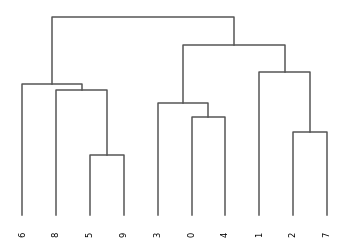

<AxesSubplot:>

In [4]:
sc.pl.dendrogram(adata, groupby = "leiden04")


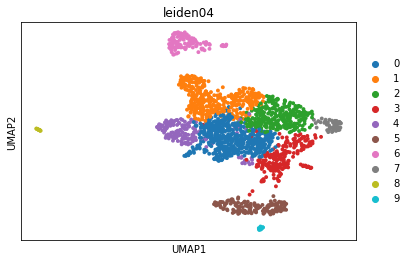

In [5]:
sc.pl.umap(adata, color=['leiden04'])


In [6]:
sc.tl.rank_genes_groups(adata, 'leiden04', method='t-test')


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/Users/minsuyoo/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [7]:
top_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)


In [10]:
top_genes

,0,1,2,3,4,5,6,7,8,9
0,Lars2,Sdc1,Nkd1,Lyz2,Hmgb2,Egfl7,Mgst1,Nkd1,Il1r2,Egfl7
1,Gm47283,Tnfrsf12a,Aspscr1,C1qc,Cenpa,Sparc,Ambp,Aspscr1,Srgn,Lmo2
2,Lgals4,Pmepa1,Mt3,Crlf1,Cdca8,Eng,Tm4sf4,Ptn,Ccr1,Eng
3,Xist,S100a14,Sypl,Ptn,Birc5,Cdh5,Tmem176b,Ifitm1,Cebpb,Lrg1
4,Oit1,Cd44,Wif1,Tgfbi,Cenpw,Igfbp7,C3,Smoc2,Fcer1g,Mmrn1


categories: EC, Macrophages, Neurons, etc.
var_group_labels: 0


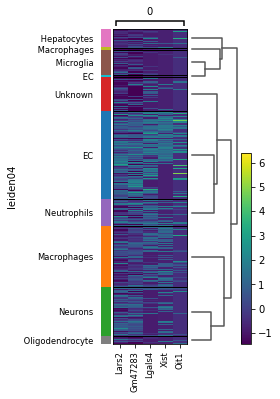

In [25]:
sc.pl.rank_genes_groups_heatmap(adata, groups="0", n_genes=5, groupby="leiden04")


In [17]:
def group_map(group_id):
    top_gene_id = 0

    for top_gene_id in range(n_shape[0]):
        sc.pl.umap(adata, color=[a[top_gene_id][group_id], 'leiden04'])


In [18]:
n_shape = a.shape

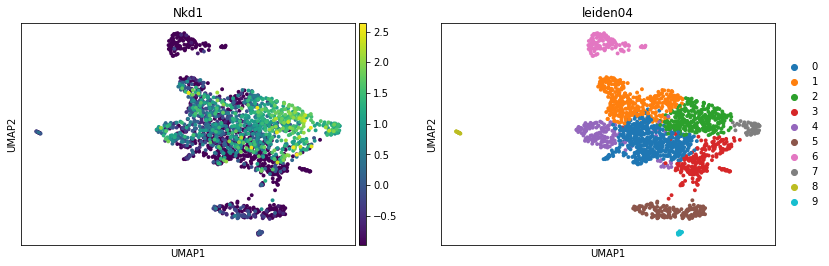

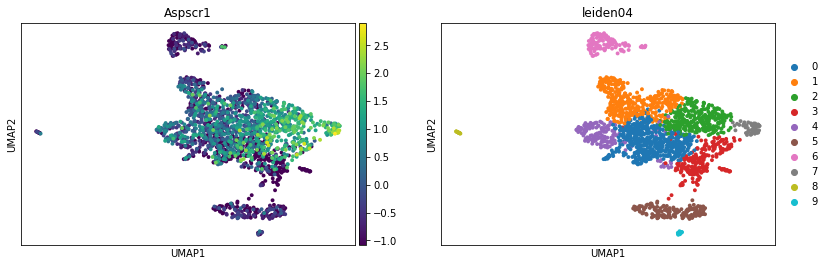

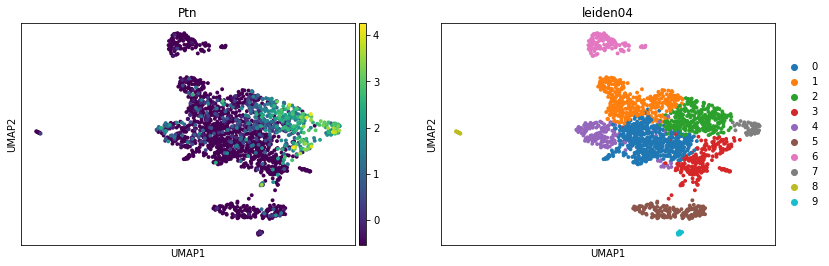

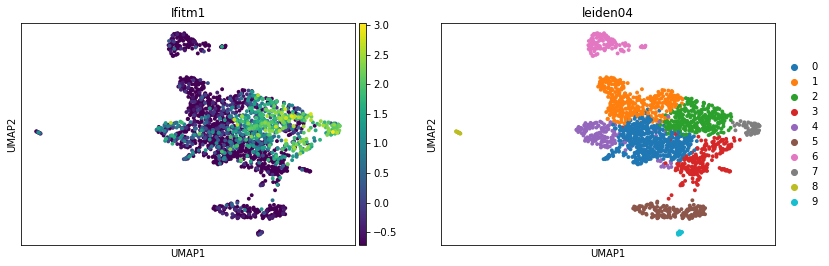

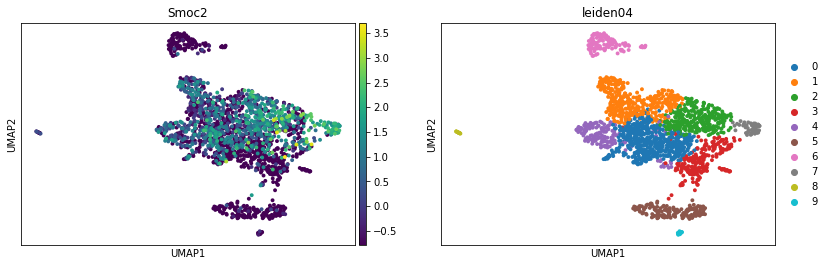

In [19]:
group_map(7)


In [20]:
highlevel_labels = {
    "0": "EC",
    "1": "Macrophages",
    "2": "Neurons",
    "3": "Unknown",
    "4": " Neutrophils",
    "5": " Microglia",
    "6": " Hepatocytes",
    "7": " Oligodendrocyte",
    "8": " Macrophages",
    "9": " EC",
    
}

In [21]:
adata.obs["leiden04"] = adata.obs["leiden04"].map(highlevel_labels)


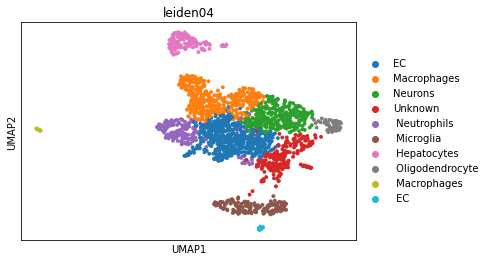

In [24]:
sc.pl.umap(adata, color='leiden04' )


categories: EC, Macrophages, Neurons, etc.
var_group_labels: 1


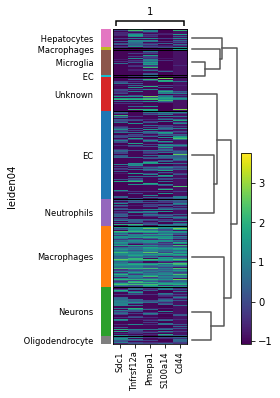

In [26]:
sc.pl.rank_genes_groups_heatmap(adata, groups="1", n_genes=5, groupby="leiden04")
